In [56]:
from keras.utils import image_dataset_from_directory
from keras.layers import Rescaling
import numpy as np

train_dataset = image_dataset_from_directory(
    directory='./dataset/training_set',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(50, 50),
)

Found 8000 files belonging to 2 classes.


['cats', 'dogs']

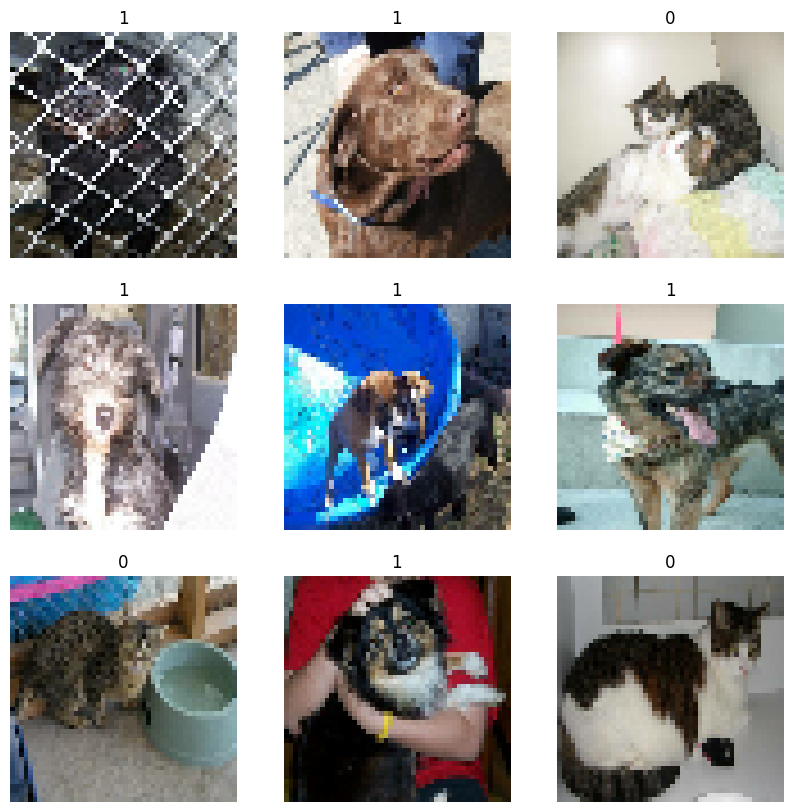

In [30]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

In [57]:
normalization_layer = Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

image_batch, labels_batch = next(iter(train_dataset))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.045294162 0.91372555


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(50, 50, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       495,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,017 (1.93 MB)

 Trainable params: 506,017 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(train_dataset, epochs=25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9382 - loss: 0.1644
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9618 - loss: 0.1138
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9622 - loss: 0.1011
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9724 - loss: 0.0840
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9832 - loss: 0.0564
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9782 - loss: 0.0660
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9827 - loss: 0.0481
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9840 - loss: 0.0437
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9916 - loss: 0.0307
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9926 - loss: 0.0260
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9904 - loss: 0.0305
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━

In [41]:
train_accuracy = model.evaluate(train_dataset)
print(train_accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9906 - loss: 0.0280
[0.02909254841506481, 0.9893749952316284]


In [43]:
test_dataset = image_dataset_from_directory(
    directory='./dataset/test_set',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(50, 50),
)

Found 2000 files belonging to 2 classes.


In [44]:
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [45]:
test_accuracy = model.evaluate(test_dataset)
print(test_dataset)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7595 - loss: 1.9181
<_MapDataset element_spec=(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [52]:
from keras.utils import load_img, img_to_array

pic_dog = load_img('./dog.jpg', target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog / 255
pic_dog = np.expand_dims(pic_dog, axis=0)
result = (model.predict(pic_dog) > 0.5).astype('int')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1]]


In [51]:
pic_cat = load_img('./cat.jpg', target_size=(50,50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat / 255
pic_cat = np.expand_dims(pic_cat, axis=0)
result = (model.predict(pic_cat) > 0.5).astype('int')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0]]
